<a href="https://colab.research.google.com/github/fzanart/Socialz/blob/wip/EA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Algorithm 1 Generate a random TSP instance.
def randomInstance(size):
  for i = 1 → size do 
    instance[i, 1] ← U(0, 1) #? Uniform random number between 0 and 1 
    instance[i, 2] ← U(0, 1) #? Uniform random number between 0 and 1
  return instance


In [ ]:
# Algorithm 2 EA for evolving problem easy and hard TSP instances
def EA(popSize, instSize, generations, time_limit, cells, repetitions, type, rnd, mutationParameters):
  poolSize ← ?popSize/2? 
  for i = 1 → popSize do 
    population[i] ← rescale(randomInstance(instSize)) 
    population[i] ← round(population[i], cells) 
    if rnd then 
    population[i] ← normalMutation(population[i]) 
    population[i] ← CutToBoundary(population[i])

  for generation = 1 → generations do 
    for k = 1 → popSize do 
    fitness[k] ← computeFitness(population[k], repetitions)

  matingPool ← createMatingPool(poolSize, population, fitness) 
  nextPopulation[1] ← population[bestOf(fitness)] ? 1-elitism

    for k = 2 → popSize do 
    parent1 ← randomElement(matingPool) 
    parent2 ← randomElement(matingPool) 
    offspring ← uniformMutation(uniformCrossover(parent1, parent2)) # uniformMutation
    if !rnd then 
      offspring ← normalMutation(offspring)
    offspring ← rescale(offspring) 
    offspring ← round(offspring, cells) 
    if rnd then 
    offspring ← normalMutation(offspring) 
    offspring ← CutToBoundary(offspring)

  population ← nextPopulation 
  if over time limit time_limit then 
  return population


In [ ]:
# Algorithm 3 Compute Fitness
def ComputeFitness(instance, repetitions):
  optimalTourLength ← concorde(instance)     #CONCORDE
  for j = 1 → repetitions do 
    twoOptTourLengths[j] ← twoOpt(instance) # Two Opt Tour length

  return mean(twoOptTourLengths)/optimalTourLength



In [ ]:
# Algorithm 4 Mating pool creation
def createMatingPool(poolSize, population, fitness):
  for i = 1 → poolSize do 
  matingPool[i] ← betterOf(randomElement(population), randomElement(population))

  return matingPool


In [ ]:
# Algorithm 5 Rescale instance

def rescale(instance):
  mins ← column_mins(instance)
  maxs ← column_maxs(instance)
  scaledPop ← ((instance − mins)**T/(maxs − mins))**T  
  
  return scaledPop

In [ ]:
# Algorithm 6 Round instance

def round(instance, cells) 
  gridRnd ← createGrid(resolution = cells) 
  instRnd ← floor(instance ∗ cells)/cells 
  for i = 1 → instSize do
    instRnd[i, ] < −SetToCellCenter(instRnd, gridRnd)
  return instRnd

In [ ]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Algorithm 1 Generate a random TSP instance.
def randomInstance(size):

  instance = []
  
  for i in range(size):
    instance.append((random.uniform(0, 1),random.uniform(0, 1)))

  return instance

In [ ]:
# Algorithm 3 Compute Fitness
def ComputeFitness(population):

  fitnessResults = {}

  def routeDistance(route):

    pathDistance = 0

    for i in range(len(route)):
      fromCity = route[i]
      toCity = None
      if i + 1 < len(route):
        toCity = route[i + 1]
      else:
        toCity = route[0]

      pathDistance += np.linalg.norm(np.array(fromCity) - np.array(toCity))

    return pathDistance

  for i in range(0,len(population)):
    fitnessResults[i] = 1/routeDistance(population[i])

  return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)



In [ ]:
# Algorithm 2 EA for evolving problem easy and hard TSP instances
def EA(popSize, instSize, generations, time_limit, cells, repetitions, type, rnd, mutationParameters):

  cityList = randomInstance(instSize)

  population = [] #first generation
  for i in range(popSize):
    population.append(random.sample(cityList, len(cityList))) # randomly select the order in which we visit each city.

  popRanked = ComputeFitness(population)






  poolSize ← ?popSize/2? 
  for i = 1 → popSize do 
    population[i] ← rescale(randomInstance(instSize)) 
    population[i] ← round(population[i], cells) 
    if rnd then 
    population[i] ← normalMutation(population[i]) 
    population[i] ← CutToBoundary(population[i])

  for generation = 1 → generations do 
    for k = 1 → popSize do 
    fitness[k] ← computeFitness(population[k], repetitions)

  matingPool ← createMatingPool(poolSize, population, fitness) 
  nextPopulation[1] ← population[bestOf(fitness)] ? 1-elitism

    for k = 2 → popSize do 
    parent1 ← randomElement(matingPool) 
    parent2 ← randomElement(matingPool) 
    offspring ← uniformMutation(uniformCrossover(parent1, parent2)) # uniformMutation
    if !rnd then 
      offspring ← normalMutation(offspring)
    offspring ← rescale(offspring) 
    offspring ← round(offspring, cells) 
    if rnd then 
    offspring ← normalMutation(offspring) 
    offspring ← CutToBoundary(offspring)

  population ← nextPopulation 
  if over time limit time_limit then 
  return population

In [ ]:
# Algorithm 4 Mating pool creation

def createMatingPool(poolSize, population, popRanked):
  
  matingPool = []
  
  matingpool.append(population[popRanked[0]])

  for i in range(poolSize):
    matingPool.append(betterOf(randomElement(population), randomElement(population))

  return matingPool

In [ ]:
popRanked

[(0, 0.0798984481700883),
 (3, 0.07734234262872756),
 (4, 0.07600497992889658),
 (1, 0.06917824537431792),
 (2, 0.06682841178994736)]

In [ ]:
popRanked[0][0]

0

In [ ]:
for i in range(0, len(selectionResults)):
    index = selectionResults[i]
    print(index)

0
4
2
3
3


In [ ]:
popRanked = ComputeFitness(population)
popRanked

[(0, 0.0798984481700883),
 (3, 0.07734234262872756),
 (4, 0.07600497992889658),
 (1, 0.06917824537431792),
 (2, 0.06682841178994736)]

In [ ]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [ ]:
selectionResults = selection(popRanked, eliteSize=1)

In [ ]:
df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
df

,Index,Fitness
0,0.0,0.079898
1,3.0,0.077342
2,4.0,0.076005
3,1.0,0.069178
4,2.0,0.066828


In [ ]:
df['cum_sum'] = df.Fitness.cumsum()
df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
df

,Index,Fitness,cum_sum,cum_perc
0,0.0,0.079898,0.079898,21.637894
1,3.0,0.077342,0.157241,42.583550
2,4.0,0.076005,0.233246,63.167024
3,1.0,0.069178,0.302424,81.901700
4,2.0,0.066828,0.369252,100.000000


In [ ]:
selectionResults = []
for i in range(0, 1):
    selectionResults.append(popRanked[i][0])
selectionResults

[0]

In [ ]:
for i in range(0, len(popRanked) - 1):
    pick = 100*random.random()
    print('pick: ',pick)
    for i in range(0, len(popRanked)):
        print('cum_perc: ',df.iat[i,3])
        if pick <= df.iat[i,3]:
          selectionResults.append(popRanked[i][0])
          break

pick:  50.184787568656354
cum_perc:  21.63789379157773
cum_perc:  42.58354960493735
cum_perc:  63.16702426556473
pick:  97.87712853040506
cum_perc:  21.63789379157773
cum_perc:  42.58354960493735
cum_perc:  63.16702426556473
cum_perc:  81.90170009945133
cum_perc:  100.0
pick:  39.5041138262712
cum_perc:  21.63789379157773
cum_perc:  42.58354960493735
pick:  27.97197889318038
cum_perc:  21.63789379157773
cum_perc:  42.58354960493735


In [ ]:
selectionResults

[0, 4, 2, 3, 3]

In [ ]:
# Route generator
def createRoute(cityList):

    route = random.sample(cityList, len(cityList)) 

    return route



# fiteness
def rankRoutes():

    



    return 

In [ ]:
# Algorithm 4 Mating pool creation
def createMatingPool(poolSize, population, fitness):
  
  matingpool = []
  for i in range(poolSize):
    
    matingPool = betterOf(randomElement(population), randomElement(population))

  return matingPool


In [ ]:
instance = randomInstance(25)
instance

[(0.04053399495157295, 0.45608787990956523),
 (0.8222488370626424, 0.14242928223173568),
 (0.9422296787282552, 0.4930359886201955),
 (0.9836633695552962, 0.233453162446846),
 (0.9864784630372138, 0.3983740641343496),
 (0.3573952034783413, 0.6849602240475081),
 (0.19975170276012133, 0.656450982594702),
 (0.9504269752109059, 0.6299913737223153),
 (0.8297060826647692, 0.7285939729396739),
 (0.019035688834836084, 0.3739752533918991),
 (0.4590974103105431, 0.1834726118588973),
 (0.5650231447389383, 0.37024650748281285),
 (0.37434261964887394, 0.16810384329711747),
 (0.6645928517883437, 0.26433872741022924),
 (0.02062939282323084, 0.6822297937320043),
 (0.7249640995032604, 0.5347068046364845),
 (0.9682348723870688, 0.3329048789084118),
 (0.3048397777373598, 0.6896157272359497),
 (0.09250928674025272, 0.4074628672818633),
 (0.9015351139291252, 0.7282148104412608),
 (0.46351542267403534, 0.35653788303648104),
 (0.24204453079674182, 0.7188905445986152),
 (0.6830312949563427, 0.8900937672059002)

In [ ]:
route = createRoute(instance)
route

[(0.9836633695552962, 0.233453162446846),
 (0.24204453079674182, 0.7188905445986152),
 (0.37434261964887394, 0.16810384329711747),
 (0.8297060826647692, 0.7285939729396739),
 (0.7249640995032604, 0.5347068046364845),
 (0.3048397777373598, 0.6896157272359497),
 (0.4590974103105431, 0.1834726118588973),
 (0.02062939282323084, 0.6822297937320043),
 (0.6645928517883437, 0.26433872741022924),
 (0.3573952034783413, 0.6849602240475081),
 (0.04053399495157295, 0.45608787990956523),
 (0.9504269752109059, 0.6299913737223153),
 (0.9864784630372138, 0.3983740641343496),
 (0.46351542267403534, 0.35653788303648104),
 (0.09250928674025272, 0.4074628672818633),
 (0.8222488370626424, 0.14242928223173568),
 (0.9422296787282552, 0.4930359886201955),
 (0.9682348723870688, 0.3329048789084118),
 (0.5650231447389383, 0.37024650748281285),
 (0.9015351139291252, 0.7282148104412608),
 (0.1047199724054848, 0.248557482599307),
 (0.6830312949563427, 0.8900937672059002),
 (0.019035688834836084, 0.3739752533918991),

In [ ]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [ ]:
population = initialPopulation(5,instance)
population

TypeError: ignored

[[(0.9864784630372138, 0.3983740641343496),
  (0.9015351139291252, 0.7282148104412608),
  (0.8222488370626424, 0.14242928223173568),
  (0.019035688834836084, 0.3739752533918991),
  (0.04053399495157295, 0.45608787990956523),
  (0.37434261964887394, 0.16810384329711747),
  (0.5650231447389383, 0.37024650748281285),
  (0.6645928517883437, 0.26433872741022924),
  (0.9682348723870688, 0.3329048789084118),
  (0.02062939282323084, 0.6822297937320043),
  (0.9836633695552962, 0.233453162446846),
  (0.1047199724054848, 0.248557482599307),
  (0.09250928674025272, 0.4074628672818633),
  (0.8297060826647692, 0.7285939729396739),
  (0.3573952034783413, 0.6849602240475081),
  (0.6830312949563427, 0.8900937672059002),
  (0.3048397777373598, 0.6896157272359497),
  (0.46351542267403534, 0.35653788303648104),
  (0.4590974103105431, 0.1834726118588973),
  (0.7249640995032604, 0.5347068046364845),
  (0.9504269752109059, 0.6299913737223153),
  (0.19975170276012133, 0.656450982594702),
  (0.9422296787282552

In [ ]:
ranking = rankRoutes(population)

In [ ]:
ranking

[(0, 0.0798984481700883),
 (3, 0.07734234262872756),
 (4, 0.07600497992889658),
 (1, 0.06917824537431792),
 (2, 0.06682841178994736)]

In [ ]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness












0.233453162446846

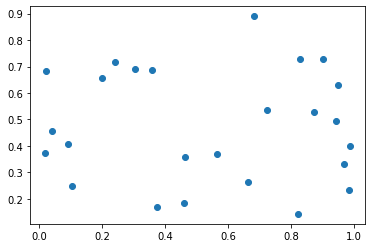

In [ ]:

plt.scatter(*zip(*instance))

plt.show()

In [ ]:
x

array([0.18751996, 0.50945669, 0.00321079, 0.70366955, 0.99054547,
       0.82206771, 0.53719478, 0.42652522, 0.81255149, 0.5755192 ])

In [ ]:
x[0:0+2]

array([0.18751996, 0.50945669])

In [ ]:
# Create first "population" (list of routes)
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

0.9948276008607537